In [61]:
from sklearn.neural_network import MLPRegressor
#from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt

# Read Image

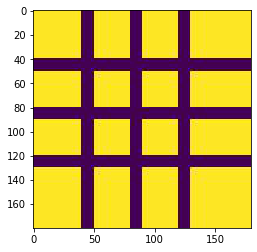

In [62]:
img=plt.imread('Image_temp.jpg')
plt.imshow(img)

# Gray scale

In [63]:
def to_gray(img):
    r, g, b =img[:,:,0], img[:,:,1],img[:,:,2]
    img_gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return img_gray

(180, 180)


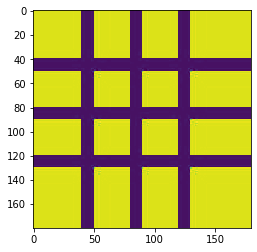

In [64]:
img_gray=to_gray(img)
print(img_gray.shape)
plt.imshow(img_gray)

# Flatten

In [65]:
s=img_gray.shape
print(s)
y=np.reshape(img_gray, (s[0]*s[1],1))
X=np.arange(y.shape[0])
X=np.reshape(X,(X.shape[0],1))
print(X.shape, y.shape)

(180, 180)
(32400, 1) (32400, 1)


# Train and test Data

In [66]:
indices=np.random.permutation(y.shape[0])
#print(indices)
train_indices=indices[:int(indices.shape[0]*0.7)]
test_indices=indices[int(indices.shape[0]*0.7):]

In [67]:
X_train=X[train_indices]
X_test=X[test_indices]
y_train=y[train_indices]
y_test=y[test_indices]
print( X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(22680, 1) (9720, 1) (22680, 1) (9720, 1)


# Distorted Image

(180, 180)


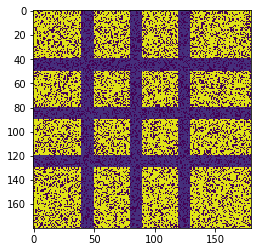

In [68]:
y_distorted=y
y_distorted[test_indices,0]=[0]*test_indices.shape[0]
image_distorted=np.reshape(y_distorted, (img_gray.shape[0], img_gray.shape[1]))
print(image_distorted.shape)
plt.imshow(image_distorted)
#image_orig=np.reshape(y, (img_gray.shape[0], img_gray.shape[1]))
#print(image_orig.shape)
#plt.imshow(image_orig)

In [84]:
reg=MLPRegressor(hidden_layer_sizes=(20,10),learning_rate_init=0.0001)
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)

C:\Users\HARSH\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HARSH\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [74]:
y_pred

array([137.58154197, 159.08601454, 119.38790015, ..., 163.84859035,
       149.67092868, 140.03571127])

In [75]:
y_rec=y_distorted
y_rec[test_indices,0]=y_pred

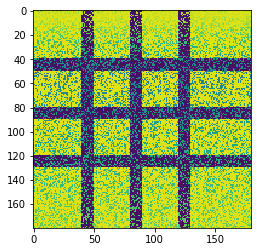

In [76]:
image_rec=np.reshape(y_rec, (img_gray.shape[0], img_gray.shape[1]))
plt.imshow(image_rec)

In [85]:
rmse=np.sqrt(np.sum((y_pred - y_test)**2))
print(rmse)

1093328.847649876


# Final Image

In [ ]:
array#concatenation of y_train and y_pred
img_final=np.reshape(array, (s[0],s[1]))

In [ ]:
distorted_array#concatenation of y_train and 0
img_final=np.reshape(array, (s[0],s[1]))